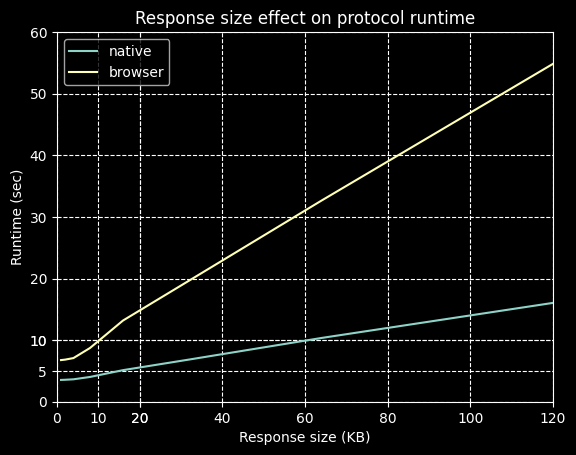

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

for dark in [True, False]:
    if dark:
        plt.style.use("dark_background")
    else:
        plt.style.use("default")

    df1 = pd.read_csv("download.native.csv", header=0)
    df2 = pd.read_csv("download.browser.csv", header=0)

    agg1 = df1.groupby("download_size")["time_total"].mean().reset_index()
    agg2 = df2.groupby("download_size")["time_total"].mean().reset_index()

    plt.plot(agg1["download_size"]/1024.0, agg1["time_total"]/1000.0, label="native")
    plt.plot(agg2["download_size"]/1024.0, agg2["time_total"]/1000.0, label="browser")

    plt.xlabel("Response size (KB)")
    plt.ylabel("Runtime (sec)")
    plt.title("Response size effect on protocol runtime")
    plt.legend(loc="upper left") 

    plt.xticks(list(range(0, 30, 10)) + list(range(20,140, 20)) )
    plt.yticks(list(range(0, 15, 5)) + list(range(10, 70, 10)) )

    plt.xlim(0, 120)
    plt.ylim(0, 60)

    plt.grid(True, linestyle="--")

    svg_name = "download_dark.svg" if dark else "download_light.svg"
    plt.savefig(svg_name, bbox_inches="tight")
    plt.show()